In [2]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wrn
wrn.filterwarnings('ignore')

In [3]:
data = pd.read_csv('C:/Users/saket/Desktop/PROJECTS/stock_pred/kaggle_ds/TCS.csv',index_col='Date')


In [4]:
data.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1683
Deliverable Volume       0
%Deliverble              0
dtype: int64

##DEALING WITH THE MISSING VALUES

In [5]:
#trades has lot of missing values of just drop it
data.drop('Trades',axis=1,inplace=True)

#we will use imputation for other missing values
median1=data['Deliverable Volume'].median()
median2=data['%Deliverble'].median()
data['Deliverable Volume']=data['Deliverable Volume'].fillna(median1)
data['%Deliverble']=data['%Deliverble'].fillna(median2)

In [6]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,
2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,5206360,0.3042
2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,1294899,0.2561
2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,976527,0.2549
2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,701664,0.2294
2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,695234,0.2624


In [7]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Deliverable Volume      int64
%Deliverble           float64
dtype: object

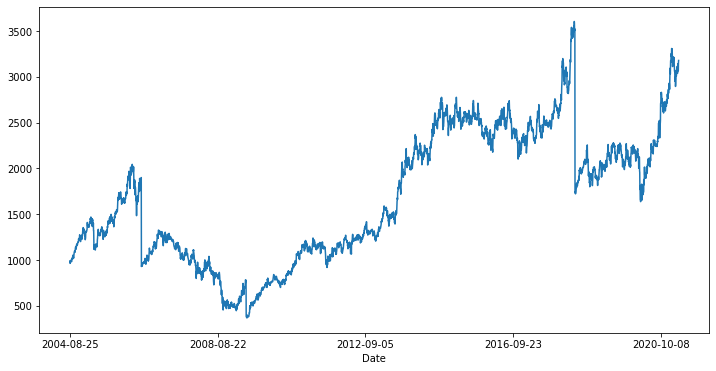

In [8]:
plt.figure(figsize=(12,6))
data['Close'].plot()

In [9]:
###calculate the rolling mean and stnd deviation of selected columns 
features=['High','Low','Volume','Turnover','VWAP','Open']
window1=3
window2=7
for feature in features:
    data[feature+'rolling_mean_3']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7']=data[feature].rolling(window=window2).mean()
for feature in features:
    data[feature+'rolling_stnd_3']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_stnd_7']=data[feature].rolling(window=window2).std()
data.head()
    

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Lowrolling_stnd_3,Lowrolling_stnd_7,Volumerolling_stnd_3,Volumerolling_stnd_7,Turnoverrolling_stnd_3,Turnoverrolling_stnd_7,VWAProlling_stnd_3,VWAProlling_stnd_7,Openrolling_stnd_3,Openrolling_stnd_7
Date,,,,,,,,,,,,,,,,,,,,,
2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,...,10.896903,NaN,7.342508e+06,NaN,7.480210e+14,NaN,19.294893,NaN,122.203887,NaN
2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,...,8.448422,NaN,1.007115e+06,NaN,1.001857e+14,NaN,8.340146,NaN,11.081667,NaN
2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,...,8.823312,NaN,5.999709e+05,NaN,5.637593e+13,NaN,7.206277,NaN,8.646965,NaN


In [10]:
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
VWAProlling_mean_3        2
VWAProlling_mean_7        6
Openrolling_mean_3        2
Openrolling_mean_7        6
Highrolling_stnd_3        2
Highrolling_stnd_7        6
Lowrolling_stnd_3         2
Lowrolling_stnd_7         6
Volumerolling_stnd_3      2
Volumerolling_stnd_7      6
Turnoverrolling_stnd_3    2
Turnoverrolling_stnd_7    6
VWAProlling_stnd_3        2
VWAProlling_stnd_7        6
Openrolling_stnd_3  

In [11]:
#drop the negligible null values 
data.dropna(inplace=True)

In [14]:
#select independent features
data.columns
ind_features=['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'VWAProlling_mean_3', 'VWAProlling_mean_7',
       'Openrolling_mean_3', 'Openrolling_mean_7', 'Highrolling_stnd_3',
       'Highrolling_stnd_7', 'Lowrolling_stnd_3', 'Lowrolling_stnd_7',
       'Volumerolling_stnd_3', 'Volumerolling_stnd_7',
       'Turnoverrolling_stnd_3', 'Turnoverrolling_stnd_7',
       'VWAProlling_stnd_3', 'VWAProlling_stnd_7', 'Openrolling_stnd_3',
       'Openrolling_stnd_7']
#data.columns

##Timeseries data needs to be divided based on date. So train_test_split not a good option.


In [15]:
##splitting the data
train_size=int(len(data)*0.65)
test_size=len(data)-train_size

train_data=data[:train_size,:]
test_data=data[train_size:,:1]


In [17]:
train_data.shape,test_data.shape

((3000, 37), (1114, 37))

### IMPLEMENTING AUTO ARIMA ML MODEL
#### open anaconda prompt
#### python -m pip install pmdarima --user

In [18]:
from pmdarima import auto_arima
model = auto_arima(y=train_data['Close'],exogenous=train_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=25777.202, Time=12.64 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=26179.758, Time=8.56 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=25875.807, Time=9.24 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=25795.123, Time=9.74 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=47197.906, Time=7.32 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=25782.169, Time=9.91 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=25780.439, Time=9.17 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=25799.814, Time=10.92 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=25777.656, Time=11.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=25794.352, Time=9.71 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=25779.217, Time=12.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=25784.371, Time=12.70 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=25775.519, Time=12.06 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=26223.703, Time=12.77 sec
 ARIMA(3,0,4

In [14]:
model.fit(train_data['Close'],train_data[ind_features])

ARIMA(order=(4, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [15]:
forecast=model.predict(n_periods=len(test_data),exogenous=test_data[ind_features])

In [16]:
test_data['Forecast_ARIMA']=forecast

Text(0, 0.5, 'Price')

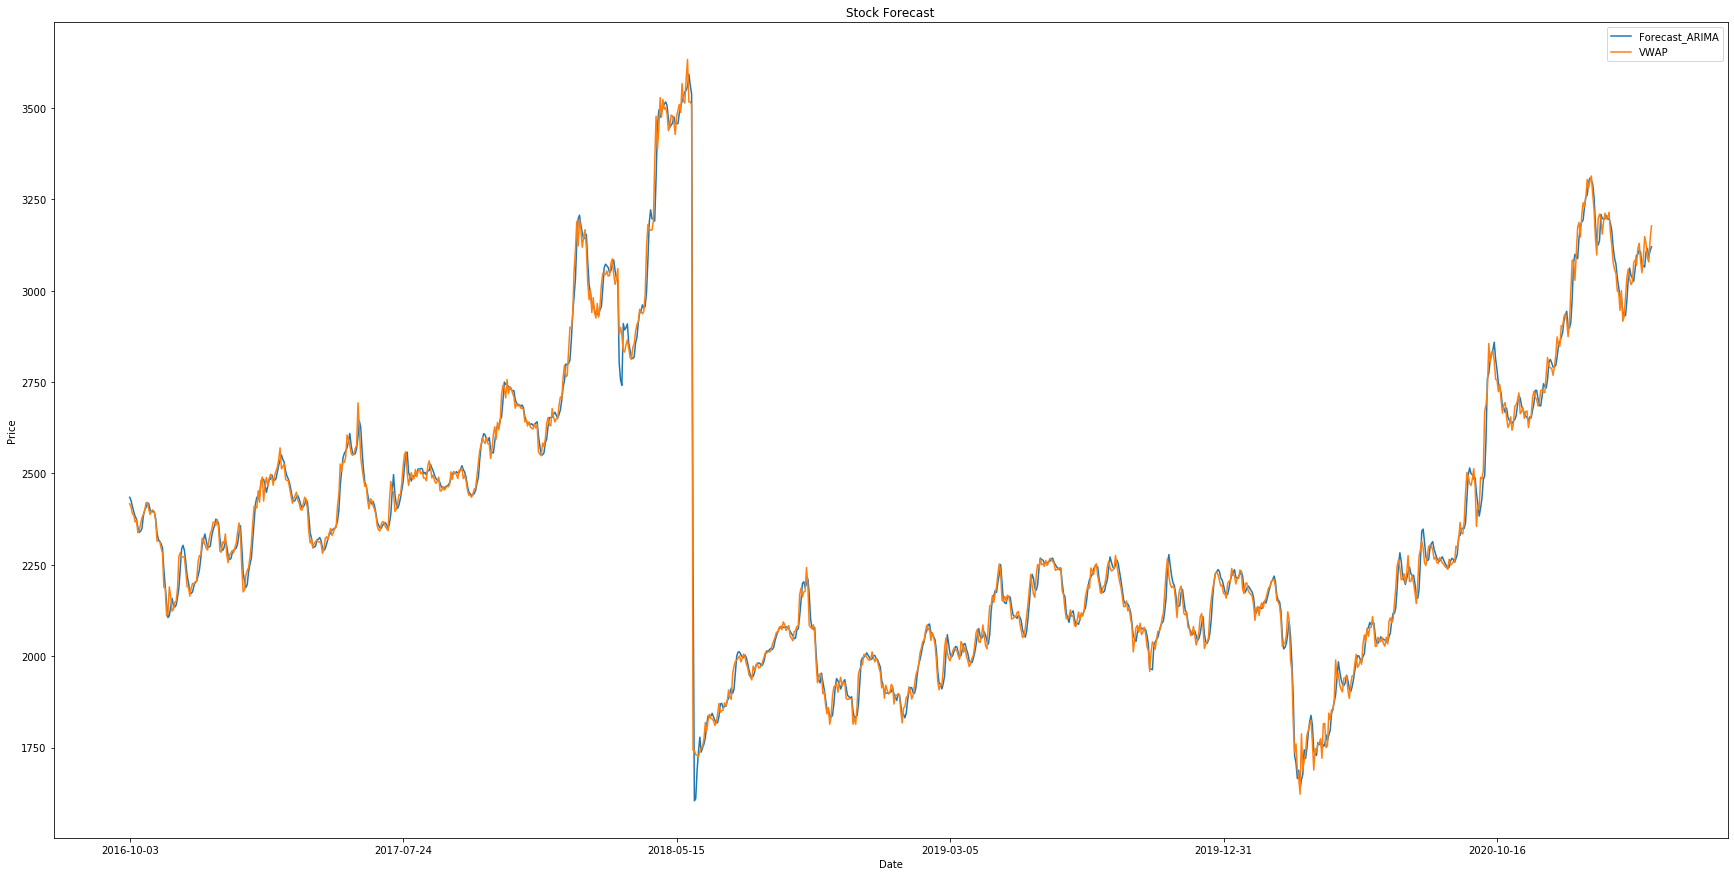

In [17]:
test_data[['Forecast_ARIMA','Close']].plot(figsize=(30,15))
plt.title('Stock Forecast')
plt.ylabel('Price')

In [18]:
#check accuracy
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE=mean_absolute_error(test_data['Close'],test_data['Forecast_ARIMA'])
RMSE=np.sqrt(mean_squared_error(test_data['Close'],test_data['Forecast_ARIMA']))

print('MAE:{}'.format(MAE))
print('RMSE:{}'.format(RMSE))

MAE:21.839616084686735
RMSE:33.96136671600727
